In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

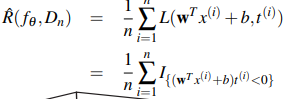

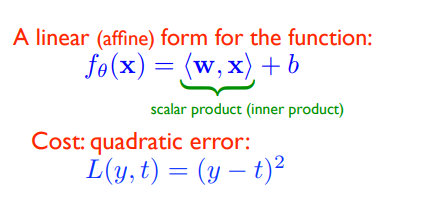

In [24]:
class regression_gradient:
    def __init__(self, capacityCtrl=1, stepSize=1):
        self.capacityCtrl = capacityCtrl
        self.stepSize = stepSize
        
        
    def ridgeRegularization(self):
        return np.linalg.norm(self.w)**2 
        
    def lossFunction(self, x, t):
        Fx = self.predict(x)
        return (Fx - t)**2
        
    def empiricalRisk(self, X, T): ## Helps to know if we are doing better or not, this is just additional info. Not actually used in the algo.
        empR = np.sum(self.lossFunction(X,T), axis=0) + self.ridgeRegularization() * self.capacityCtrl
        return empR.reshape((1))[0]
    
    def derivativeW(self, X, T):
        deriv = 2*X*(self.predict(X) - T) + 2*self.capacityCtrl*np.linalg.norm(self.w)
        return np.sum(deriv, axis=0) / self.n ## The average of all derivatives 
    
    def derivativeB(self, X, T):
        deriv = 2*(self.predict(X) - T)
        return np.sum(deriv, axis=0) / self.n ## The average of all derivatives
    
    def predict(self, X):
        if (self.d == 1):
            return self.w * X + self.b
        return self.w.T.dot(X) + self.b
        
    def learn(self, data, targets, nbSteps = 1000):
        self.d = data.shape[1]
        self.n = data.shape[0]
        self.trainSet = data
        self.targets = targets
        historyLoss = []
        # init W and b
        self.w = np.zeros(self.d).reshape((self.d,1))
        self.b = 0
        
        i = 0
        while( i < nbSteps):
            new_w = self.w - self.stepSize * self.derivativeW(self.trainSet, self.targets)
            new_b = self.b - self.stepSize * self.derivativeB(self.trainSet, self.targets)
            self.w = new_w
            self.b = new_b
            i += 1
            # just to historize the loss
            historyLoss.append(self.empiricalRisk(self.trainSet, self.targets))

        return historyLoss
            
    


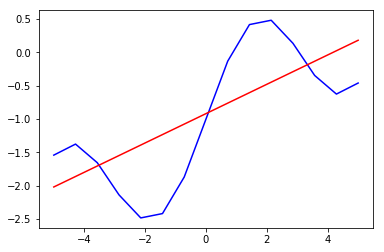

range(0, 30)


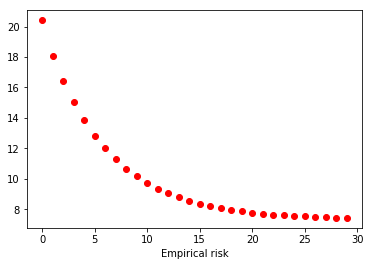

w value  [[0.22021603]]
b value  [-0.9180338]
last Empirical risk:  7.424692807585115


In [25]:

def H(data):
    targets = np.sin(data) + 0.3*data -1
    return targets

data = np.linspace(-5., 5., 15)
data = data.reshape((15,1))
#print(data)
targets = H(data)
#print(targets)

GD = regression_gradient(0,0.04)
historyLoss = GD.learn(data, targets, 30)
predictions = GD.predict(data)

plt.plot(data,targets, 'b')
plt.plot(data,predictions, 'r')
plt.show()

print (range(0, len(historyLoss)))
plt.plot(np.arange(len(historyLoss)),historyLoss, 'ro')
plt.xlabel("Number of passes")
plt.xlabel("Empirical risk")
plt.show()

print("w value ", GD.w)
print("b value ", GD.b)
print("last Empirical risk: ", historyLoss[-1])